Here we can take a look at some of the properties of our data.  

We will look at 1000 samples and see the vocabulary and characters used.

In [1]:
from patentdata.corpus import USPublications
from collections import Counter

path = '/media/SAMSUNG1/Patent_Downloads'
ds = USPublications(path)

In [2]:
# If data exists load, else generate
import os
import pickle

PIK = "pickle.dat"

if os.path.isfile(PIK):
    with open(PIK, "rb") as f:
        print("Loading data")
        total_token_counter, total_char_counter = pickle.load(f)
        
else:
    doc_generator = ds.patentdoc_generator(classification=["G", "06"], publication_numbers=None, sample_size=1000)
    total_token_counter = Counter()
    total_char_counter = Counter()
    for doc in doc_generator:
        total_token_counter += doc.unfiltered_counter
        total_char_counter += doc.character_counter
    
    data = (total_token_counter, total_char_counter)

    with open(PIK, "wb") as f:
        pickle.dump(data, f)

Loading data


In [3]:
print("Total Number of Tokens (vocabulary) = {0}".format(len(total_token_counter)))
print("Total Number of Characters (vocabulary) = {0}".format(len(total_char_counter)))

Total Number of Tokens (vocabulary) = 100435
Total Number of Characters (vocabulary) = 287


In [4]:
total_char_counter

Counter({'\n': 313476,
         ' ': 9808516,
         '!': 199,
         '#': 693,
         '$': 774,
         '%': 1613,
         '&': 581,
         "'": 11461,
         '(': 101062,
         ')': 102591,
         '*': 1527,
         '+': 4470,
         ',': 531591,
         '-': 116307,
         '.': 463065,
         '/': 33970,
         '0': 249335,
         '1': 276486,
         '2': 185829,
         '3': 104958,
         '4': 100630,
         '5': 77638,
         '6': 73015,
         '7': 43646,
         '8': 54356,
         '9': 33963,
         ':': 20198,
         ';': 34201,
         '<': 2353,
         '=': 7826,
         '>': 2509,
         '?': 308,
         '@': 191,
         'A': 109076,
         'B': 36929,
         'C': 58999,
         'D': 55537,
         'E': 38942,
         'F': 97468,
         'G': 63638,
         'H': 17090,
         'I': 172158,
         'J': 4651,
         'K': 5595,
         'L': 35290,
         'M': 48941,
         'N': 30199,
         'O': 358

In [5]:
total_char_counter.most_common(100)

[(' ', 9808516),
 ('e', 6309526),
 ('t', 4594275),
 ('a', 3856608),
 ('i', 3797413),
 ('o', 3599920),
 ('n', 3582786),
 ('r', 3249892),
 ('s', 3018913),
 ('c', 2029536),
 ('d', 1889379),
 ('h', 1822660),
 ('l', 1665489),
 ('m', 1466382),
 ('p', 1252953),
 ('u', 1204876),
 ('f', 1050703),
 ('g', 917543),
 ('b', 660881),
 ('y', 640928),
 (',', 531591),
 ('v', 523576),
 ('.', 463065),
 ('w', 453487),
 ('\n', 313476),
 ('1', 276486),
 ('0', 249335),
 ('2', 185829),
 ('I', 172158),
 ('k', 170921),
 ('x', 144472),
 ('T', 143100),
 ('-', 116307),
 ('A', 109076),
 ('3', 104958),
 (')', 102591),
 ('(', 101062),
 ('4', 100630),
 ('F', 97468),
 ('S', 88394),
 ('5', 77638),
 ('6', 73015),
 ('q', 68089),
 ('P', 68079),
 ('G', 63638),
 ('C', 58999),
 ('D', 55537),
 ('8', 54356),
 ('M', 48941),
 ('R', 44023),
 ('7', 43646),
 ('z', 40751),
 ('E', 38942),
 ('j', 38896),
 ('B', 36929),
 ('O', 35899),
 ('L', 35290),
 (';', 34201),
 ('/', 33970),
 ('9', 33963),
 ('N', 30199),
 ('U', 25225),
 ('“', 22080),

Based on the characters above limiting to printable characters seems a good compromise. We loose the maths symbols and greek variable names though.

A more clever replacement would be to apply a mapping that maps out of vocab characters to their nearest character equivalent (e.g. alpha to 'a', the variety of equals to = or <>, accents to unaccented letters etc.).

In [6]:
total_token_counter.most_common(100)

[('the', 757112),
 (',', 525440),
 ('.', 410518),
 ('a', 343042),
 ('of', 342584),
 ('to', 261987),
 ('and', 209942),
 ('in', 158468),
 ('is', 155152),
 (')', 102591),
 ('(', 101062),
 ('be', 100304),
 ('for', 99248),
 ('or', 92516),
 ('The', 83798),
 ('an', 80615),
 ('may', 77584),
 ('that', 74525),
 ('data', 67454),
 ('as', 67006),
 ('by', 63512),
 ('with', 59309),
 ('system', 52865),
 ('are', 50213),
 ('on', 48689),
 ('one', 47230),
 ('from', 46835),
 ('information', 45658),
 ('FIG', 44768),
 ('In', 39862),
 ('user', 39321),
 ('can', 37965),
 ('device', 37193),
 ('at', 36969),
 ('which', 35193),
 (';', 34201),
 ('example', 31794),
 ('image', 31535),
 ('such', 27587),
 ('first', 27294),
 ('not', 27152),
 ('invention', 24565),
 ('method', 24518),
 ('other', 24480),
 ('embodiment', 24192),
 ('each', 24041),
 ('more', 23716),
 ('“', 22080),
 ('”', 22052),
 ('1', 21818),
 ('computer', 21671),
 ('processing', 21065),
 ('second', 20449),
 ('network', 20153),
 ('wherein', 20017),
 ('present

We can maybe have lower case tokens if we introduce a <CAPITAL> token that is inserted before the word.  

Another idea is to use a stemmer but to add back in the ending as an extra token.  Similar to the word pieces in Google's Neural Machine Translate. Porter stemmer in NLTK just takes the word and stems it - we need to do a bit of algorithmic magic to get the ending.

In [14]:
total_token_counter.most_common()[:-1000-1:-1] 

[('E2=', 1),
 ('.getCounter', 1),
 ('electronic-mail', 1),
 ('RMS.T11', 1),
 ('FOB', 1),
 ('multi-destination', 1),
 ('Qmax', 1),
 ('65537', 1),
 ('CGI/VPI', 1),
 ('10/937,933', 1),
 ('CL_ABAP_CHAR_UTILITIES=', 1),
 ('C52', 1),
 ('Everything', 1),
 ('double-counted', 1),
 ('300.00', 1),
 ('IG=ON', 1),
 ('utilize—to', 1),
 ('688,543,329,448,792', 1),
 ('confounded', 1),
 ('Lost', 1),
 ('deep-frozen', 1),
 ('wd', 1),
 ('five-camera', 1),
 ('host-to-device', 1),
 ('PNX', 1),
 ('TDS', 1),
 ('Bname', 1),
 ('surreptitious', 1),
 ('Revert', 1),
 ('8,332,350', 1),
 ('condition—if', 1),
 ('N1join', 1),
 ('homogenization', 1),
 ('breadcrumb', 1),
 ('getUsersItemCounter', 1),
 ('broker-dealer', 1),
 ('Cartridge', 1),
 ('1×108', 1),
 ('7.54', 1),
 ('phoned', 1),
 ('4731.38', 1),
 ('CJC', 1),
 ('unaddressed', 1),
 ('yearly.', 1),
 ('canines', 1),
 ('opponent', 1),
 ('A-I', 1),
 ('APL1P202D1', 1),
 ('400×g', 1),
 ('4231', 1),
 ('Seltzer', 1),
 ('proprietor', 1),
 ('225.079', 1),
 ('A3A4A0A0', 1),
 (

Observation: lots of these are hyphens, maths, reference numerals or patent documents.

Do we UNK these? Or convert them in some other way.

Replace patent numbers with <PATENT_NUMBER>.

Replace hyphen words with the two separate words (and <HYPHEN> token inserted before hand).

Replace slash words (e.g. I/O) with two separate words (and <SLASH> token inserted before hand) - but and/or probably best left as one token).

If punctuation in token split on punctuation.
Regex strings for patent numbers: "

In [10]:
# Threshold tokens based on frequency
# threshold = 1
for threshold in range (0, 10):
    filtered_token_counter = Counter({k: c for k, c in total_token_counter.items() if c > threshold})
    print("Filtering out frequencies less than or equal to {0} returns {1} unique tokens".format(threshold, len(filtered_token_counter)))

Filtering out frequencies less than or equal to 0 returns 100435 unique tokens
Filtering out frequencies less than or equal to 1 returns 56278 unique tokens
Filtering out frequencies less than or equal to 2 returns 43106 unique tokens
Filtering out frequencies less than or equal to 3 returns 36227 unique tokens
Filtering out frequencies less than or equal to 4 returns 31654 unique tokens
Filtering out frequencies less than or equal to 5 returns 28571 unique tokens
Filtering out frequencies less than or equal to 6 returns 26232 unique tokens
Filtering out frequencies less than or equal to 7 returns 24386 unique tokens
Filtering out frequencies less than or equal to 8 returns 22836 unique tokens
Filtering out frequencies less than or equal to 9 returns 21556 unique tokens


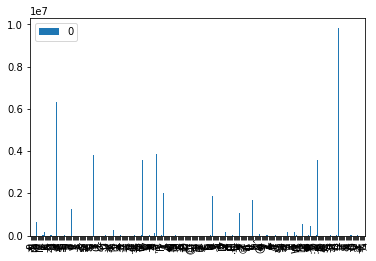

In [12]:
import pandas
%matplotlib inline  
df = pandas.DataFrame.from_dict(total_char_counter, orient='index')
df.plot(kind='bar')

In [11]:
from nltk.stem.porter import *

def stem(tokens):
    """ Stem passed text tokens. """
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

In [13]:
stemmed_common = stem([token for token, _ in total_token_counter.most_common(100)])

In [14]:
stemmed_common

['the',
 ',',
 '.',
 'a',
 'of',
 'to',
 'and',
 'in',
 'is',
 ')',
 '(',
 'be',
 'for',
 'or',
 'the',
 'an',
 'may',
 'that',
 'data',
 'as',
 'by',
 'with',
 'system',
 'are',
 'on',
 'one',
 'from',
 'inform',
 'fig',
 'In',
 'user',
 'can',
 'devic',
 'at',
 'which',
 ';',
 'exampl',
 'imag',
 'such',
 'first',
 'not',
 'invent',
 'method',
 'other',
 'embodi',
 'each',
 'more',
 '“',
 '”',
 '1',
 'comput',
 'process',
 'second',
 'network',
 'wherein',
 'present',
 ':',
 'A',
 'unit',
 'storag',
 'thi',
 'claim',
 'time',
 'memori',
 'said',
 'use',
 'step',
 'valu',
 'server',
 'it',
 'control',
 'applic',
 'ha',
 'number',
 'will',
 'when',
 'includ',
 'process',
 'display',
 'least',
 'includ',
 'accord',
 'also',
 'for',
 '2',
 'ani',
 'describ',
 'shown',
 'base',
 'modul',
 'set',
 'embodi',
 'program',
 'use',
 'between',
 'content',
 'further',
 'if',
 'and/or',
 'oper']

In [22]:
def stem_split(tokens):
    """ Stem passed text tokens. """
    stemmer = PorterStemmer()
    token_list = list()
    for token in tokens:
        stem = stemmer.stem(token)
        split_list = token.split(stem)
        if token == stem:
            token_list.append(token)
        elif len(split_list) > 1:
            token_list.append(stem)
            token_list.append(split_list[1])
        else:
            token_list.append(split_list[0])
    return token_list

In [23]:
stem_and_split = stem_split([token for token, _ in total_token_counter.most_common(100)])

In [24]:
stem_and_split

['the',
 ',',
 '.',
 'a',
 'of',
 'to',
 'and',
 'in',
 'is',
 ')',
 '(',
 'be',
 'for',
 'or',
 'The',
 'an',
 'may',
 'that',
 'data',
 'as',
 'by',
 'with',
 'system',
 'are',
 'on',
 'one',
 'from',
 'inform',
 'ation',
 'FIG',
 'In',
 'user',
 'can',
 'devic',
 'e',
 'at',
 'which',
 ';',
 'exampl',
 'e',
 'imag',
 'e',
 'such',
 'first',
 'not',
 'invent',
 'ion',
 'method',
 'other',
 'embodi',
 'ment',
 'each',
 'more',
 '“',
 '”',
 '1',
 'comput',
 'er',
 'process',
 'ing',
 'second',
 'network',
 'wherein',
 'present',
 ':',
 'A',
 'unit',
 'storag',
 'e',
 'thi',
 's',
 'claim',
 'time',
 'memory',
 'said',
 'use',
 'd',
 'step',
 'valu',
 'e',
 'server',
 'it',
 'control',
 'applic',
 'ation',
 'ha',
 's',
 'number',
 'will',
 'when',
 'includ',
 'es',
 'process',
 'display',
 'least',
 'includ',
 'e',
 'accord',
 'ing',
 'also',
 'For',
 '2',
 'any',
 'describ',
 'ed',
 'shown',
 'base',
 'd',
 'modul',
 'e',
 'set',
 'embodi',
 'ments',
 'program',
 'using',
 'between',
 

If we can split and there are two entries split into stem + split[1].  

If token = stem leave.

If token /= stem and there is one split entry (i.e. everything else):
    This has some case changes which will be sorted if we pre-process capitals.
    Sensible way is that token = split rather than stem

In [38]:
def capitals_process(tokens):
    """ Process a list of tokens and lower case.
    
    Adds a new <CAPITAL> token before a capitalised word to retain capital information."""
    token_list = list()
    for token in tokens:
        if token[0].isupper():
            if len(token) > 1:
                if token[1].isupper():
                    token_list.append("<ALL_CAPITAL>")
                else:
                    token_list.append("<CAPITAL>")
        token_list.append(token.lower())
    return token_list

In [39]:
doc

<Patent Document object for US20030023561A1, title: System for controlling the distribution and use of digital works - containing: description with 583 paragraphs and claimset with 14 claims; classifications: [['G', '06', 'F', '017', '60']]

In [40]:
tokens = sum([p.words for p in doc.description.paragraphs], []) + sum([c.words for c in doc.claimset.claims], [])

In [41]:
tokens[2000:3000]

['work',
 '.',
 'For',
 'example',
 ',',
 'it',
 'can',
 'help',
 'prevent',
 'digital',
 'ticket',
 'forgery',
 '.',
 'Special',
 'ticket',
 'agents',
 'are',
 'also',
 'useful',
 'in',
 'situations',
 'where',
 'an',
 'external',
 'database',
 'needs',
 'to',
 'be',
 'updated',
 'or',
 'checked',
 '.',
 '0017',
 'A',
 'digital',
 'ticket',
 'is',
 'merely',
 'an',
 'instance',
 'of',
 'a',
 'digital',
 'work',
 '.',
 'Thus',
 ',',
 'a',
 'digital',
 'ticket',
 'may',
 'be',
 'distributed',
 'among',
 'repositories',
 'in',
 'the',
 'same',
 'fashion',
 'as',
 'other',
 'digital',
 'works',
 '.',
 '0018',
 'A',
 'digital',
 'ticket',
 'may',
 'be',
 'used',
 'in',
 'many',
 'commercial',
 'scenarios',
 'such',
 'as',
 'in',
 'the',
 'purchase',
 'of',
 'software',
 'and',
 'prepaid',
 'upgrades',
 '.',
 'A',
 'digital',
 'ticket',
 'may',
 'also',
 'be',
 'used',
 'to',
 'limit',
 'the',
 'number',
 'of',
 'times',
 'that',
 'a',
 'right',
 'may',
 'be',
 'exercised',
 '.',
 'For',
 '

In [42]:
len(tokens)

34078

In [43]:
caps_processed = capitals_process(tokens)
stem_and_split = stem_split(caps_processed)
len(stem_and_split)

46041

In [44]:
stem_and_split

['0001',
 '<CAPITAL>',
 'the',
 'present',
 'invent',
 'ion',
 'relat',
 'es',
 'to',
 'the',
 'field',
 'of',
 'distribut',
 'ion',
 'and',
 'usag',
 'e',
 'right',
 's',
 'enforc',
 'ement',
 'for',
 'digit',
 'ally',
 'encod',
 'ed',
 'work',
 's',
 '.',
 '0002',
 'a',
 'fundament',
 'al',
 'issu',
 'e',
 'facing',
 'the',
 'publish',
 'ing',
 'and',
 'inform',
 'ation',
 'industri',
 'es',
 'as',
 'they',
 'consid',
 'er',
 'electron',
 'ic',
 'publish',
 'ing',
 'is',
 'how',
 'to',
 'prevent',
 'the',
 'unauthor',
 'ized',
 'and',
 'unaccount',
 'ed',
 'distribut',
 'ion',
 'or',
 'usag',
 'e',
 'of',
 'electron',
 'ically',
 'publish',
 'ed',
 'materi',
 'als',
 '.',
 '<CAPITAL>',
 'electron',
 'ically',
 'publish',
 'ed',
 'materi',
 'als',
 'are',
 'typic',
 'ally',
 'distribut',
 'ed',
 'in',
 'a',
 'digit',
 'al',
 'form',
 'and',
 'recreat',
 'ed',
 'on',
 'a',
 'comput',
 'er',
 'base',
 'd',
 'system',
 'having',
 'the',
 'capability',
 'to',
 'recreat',
 'e',
 'the',
 'm

In [45]:
token_counts = Counter(stem_and_split)
print(len(token_counts))

2687


In [46]:
unprocessed = Counter(tokens)
print(len(unprocessed))

3767


Reduces dimensionality by 1000.

In [ ]:
import re
REGEX_US_APPLICATION = r"\d{2}\/\d{3},\d{3}"
REGEX_US_GRANT = r"\d,\d{3},\d{3}"

In [15]:
ts = "display/UI"
if "/" in ts:
    parts = ts.split("/")
    print(parts[0], "or", parts[1])

display or UI


In [17]:
len(parts)

2

In [18]:
parts

['display', 'UI']

In [20]:
token = "History"
token_list = list()
token = "".join(
                [ c if c.isalnum() else " " for c in token ]
                )
for substrings in token.split(" "):
    token_list.append(substrings)
print(token_list)

['History']


Issue is this is stripping out all punctuation, which we need. We need to first filter on tokens with alphanumeric characters.

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'